In [85]:
import pandas as pd
import os
import missingno as msno
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder

In [86]:
possible_paths = [
    'C:/Users/lenne/OneDrive/Documenten/Master of Statistics and Data Science/2023-2024/Master thesis/Thesis_Sofia_Lennert/new_data',
    'C:/Users/anaso/Desktop/SOFIA MENDES/KU Leuven/Master Thesis/Thesis_Sofia_Lennert/new_data'
]

# Define file names
file = 'merged_data.csv'

# Find full paths to the CSV files
path = next((f'{path}/{file}' for path in possible_paths if os.path.exists(f'{path}/{file}')), None)

In [87]:
# Resulting DataFrame will have aggregated data from all four datasets based on the specific_column
pd.set_option('display.max_columns', None)

In [88]:
data = pd.read_csv(path)
data

,USUBJID,AGE,SEX,RACE,CONTINENT,CESEV,CECONTRT,TOTRELAP,MHCONTRT,MHDIAGN,CARDIO,URINARY,MUSCKELET,FATIGUE,SMSTDY,NRELAP,NHPT-before,NHPT-2y,NHPT-after_2y,PASAT_2s-before,PASAT_2s-2y,PASAT_2s-after_2y,PASAT_3s-before,PASAT_3s-2y,PASAT_3s-after_2y,SDMT-before,SDMT-2y,T25FW-before,T25FW-2y,T25FW-after_2y,T-before,T-after,P-before,P-after,N-before,N-after,DS,DS_L,DS_R,SLEC_before,SLEC_after,SES_after,SES_before,VAA,BDI-before,BDI-after,EDSS-before,EDSS-2y,EDSS-after_2y,KFSS1-Sensory-2y,KFSS1-Sensory-after_2y,KFSS1-Sensory-before,KFSS1-Brain-2y,KFSS1-Brain-after_2y,KFSS1-Brain-before,KFSS1-Bowel-2y,KFSS1-Bowel-after_2y,KFSS1-Bowel-before,KFSS1-Pyramidal-2y,KFSS1-Pyramidal-after_2y,KFSS1-Pyramidal-before,KFSS1-Cerebral-2y,KFSS1-Cerebral-after_2y,KFSS1-Cerebral-before,KFSS1-Visual-2y,KFSS1-Visual-after_2y,KFSS1-Visual-before,KFSS1-Cerebellar-2y,KFSS1-Cerebellar-after_2y,KFSS1-Cerebellar-before,KFSS_M-2y,KFSS_M-after_2y,KFSS_M-before,KFSS_P-2y,KFSS_P-after_2y,KFSS_P-before,RAND36_M-before,RAND36_M-after,RAND36_P-before,RAND36_P-after,SF12_M-before,SF12_M-after,SF12_P-before,SF12_P-after
0,MSOAC/0649,NaN,F,WHITE,NORTH AMERICA,NaN,NaN,NaN,Y,SPMS,0,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.35,10.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MSOAC/2224,38.0,F,WHITE,EUROPE,NaN,NaN,NaN,NaN,RRMS,0,1,0,0,NaN,NaN,27.80,26.55,NaN,NaN,NaN,NaN,55.0,56.0,NaN,38.0,42.0,8.90,8.85,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,30.0,30.0,1.25,1.25,NaN,0.380952,0.388889,3.00,3.0,NaN,0.000000,NaN,0.000000,0.2,NaN,0.2,0.000000,NaN,0.000000,0.5,NaN,0.500000,0.0,NaN,0.0,0.000000,NaN,0.0,0.0,NaN,0.0,0.148148,NaN,0.148148,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,0.8,0.7,0.5,0.5
2,MSOAC/0576,50.0,F,WHITE,NaN,NaN,NaN,NaN,Y,PPMS,0,1,0,1,NaN,NaN,17.75,18.65,17.90,51.0,56.5,56.5,59.0,59.0,59.5,NaN,NaN,4.55,4.70,5.15,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.75,4.0,4.25,0.333333,0.250000,0.333333,0.0,0.0,0.1,0.250000,0.166667,0.333333,0.5,0.500000,0.500000,0.0,0.2,0.0,0.083333,0.083333,0.0,0.4,0.4,0.3,0.240741,0.277778,0.259259,0.166667,0.125000,0.166667,0.628571,0.671429,0.594937,0.531646,NaN,NaN,NaN,NaN
3,MSOAC/4961,44.0,F,WHITE,NaN,NaN,NaN,NaN,Y,PPMS,0,1,1,1,NaN,NaN,19.75,19.45,20.60,38.5,52.0,54.0,55.5,59.0,58.0,NaN,NaN,4.00,4.90,5.60,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.50,3.5,3.50,0.333333,0.250000,0.333333,0.0,0.1,0.0,0.166667,0.250000,0.250000,0.5,0.500000,0.416667,0.0,0.2,0.0,0.000000,0.000000,0.0,0.2,0.3,0.3,0.185185,0.277778,0.222222,0.083333,0.125000,0.125000,0.614286,0.614286,0.582278,0.645570,NaN,NaN,NaN,NaN
4,MSOAC/5990,52.0,F,WHITE,NaN,NaN,NaN,NaN,Y,PPMS,1,1,0,1,NaN,NaN,21.45,21.35,22.75,22.0,23.5,22.0,35.0,41.5,44.0,NaN,NaN,11.40,16.80,30.20,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.00,6.0,6.50,0.166667,0.333333,0.166667,0.2,0.2,0.2,0.166667,0.166667,0.166667,0.5,0.666667,0.500000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.4,0.0,0.222222,0.333333,0.185185,0.083333,0.166667,0.083333,0.600000,0.742857,0.506329,0.531646,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2460,MSOAC/2501,46.0,F,WHITE,NaN,NaN,NaN,12.0,NaN,SPMS,0,0,0,0,NaN,NaN,29.40,25.65,NaN,14.0,12.0,NaN,17.5,16.0,NaN,NaN,NaN,9.30,8.10,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.00,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.642857,0.614286,0.645570,0.588608,NaN,NaN,NaN,NaN
2461,MSOAC/8672,43.0,F,NaN,NaN,MODERATE,NaN,1.0,NaN,RRMS,

Set to 0 because ... (write the explanation)

In [89]:
data['NRELAP'] = data['NRELAP'].fillna(0)

In [90]:
missing_percentage_data = (data.isnull().sum() / len(data)) * 100
missing_data = pd.DataFrame({'Column Name': missing_percentage_data.index, 'Missing Percentage': missing_percentage_data.values})
missing_data = missing_data.sort_values(by='Missing Percentage', ascending=False)
missing_data.head(60)

,Column Name,Missing Percentage
8,MHCONTRT,88.235294
37,DS_L,87.423935
38,DS_R,87.423935
36,DS,87.423935
21,PASAT_2s-after_2y,85.922921
6,CECONTRT,82.799189
83,SF12_P-after,79.918864
81,SF12_M-after,79.918864
26,SDMT-2y,79.878296
82,SF12_P-before,79.797160


In [91]:
missing_data[missing_data['Column Name'] == 'RACE']

,Column Name,Missing Percentage
3,RACE,31.399594


In [92]:
data = data.dropna(subset='RACE', how='any')

Question from them during meeting: how many rows we have for which the targets are all there (supervised, other rows would be 'semi-supervised') -- note I don't yet use all the targets here because I feel it will be 0 (it's already 154 now using only the most occuring functional tests)

In [93]:
# Specify the list of variables
#variables = ['NRELAP', 'CESEV', 'SMSTDY', 'EDSS-2y', 'EDSS-after_2y', 'NHPT-2y', 'NHPT-after_2y', 'T25FW-2y', 'T25FW-after_2y']
variables = ['EDSS-2y', 'T25FW-2y']

# Check for rows where there are no missing values in any of the specified variables
rows_with_no_missing_values = data.dropna(subset=variables, how='any')

# Display the number of rows with no missing values
print("Number of complete cases (fully annotated dataset):", len(rows_with_no_missing_values))

Number of complete cases (fully annotated dataset): 1597


try to use the package Robbe set (these plots are not informative so we can remove later - only do for outputs)

In [94]:
#msno.matrix(data)

In [95]:
#msno.bar(data)

In [96]:
#msno.heatmap(data)

<Axes: >

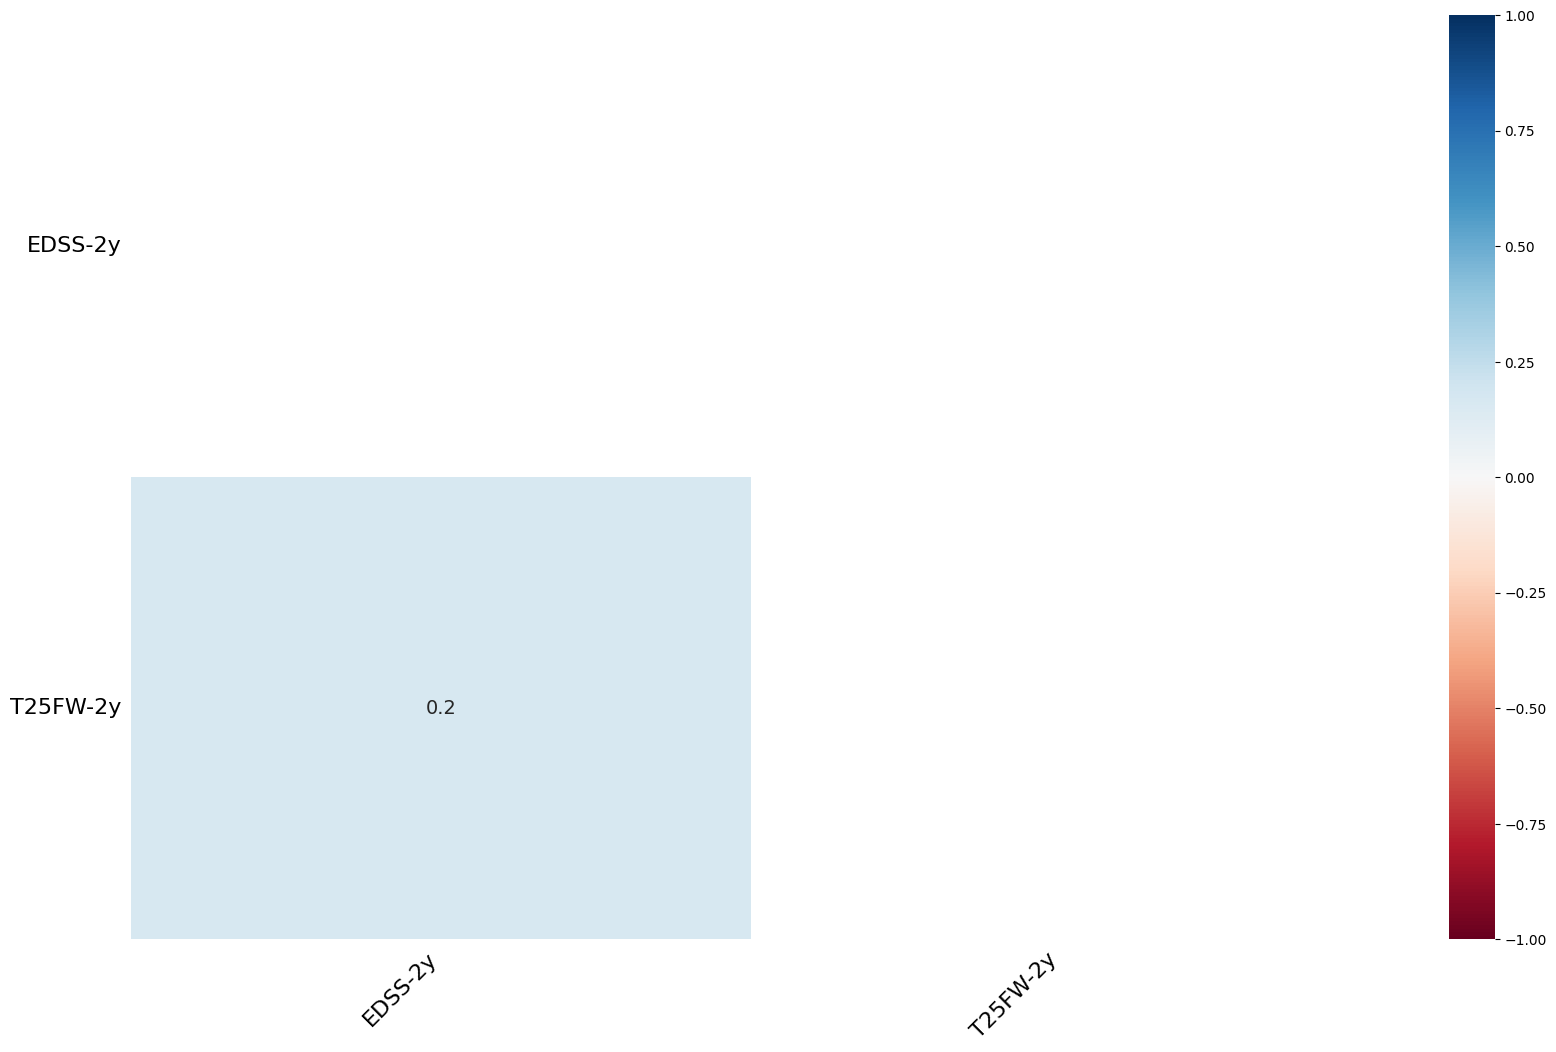

In [97]:
targets = data[variables]
msno.heatmap(targets)

## Chain with 2 models

Train-test split

In [98]:
# Assuming 'data' is a pandas DataFrame
variables = ['EDSS-2y', 'T25FW-2y']

# Select complete cases
complete_cases = data.dropna(subset=variables, how='any')
len(complete_cases)

1597

In [99]:
# Select non-complete cases
non_complete_cases = data[~data.index.isin(complete_cases.index)]
len(non_complete_cases)

94

First split in fully annotated and weakly annotated dataset (for training: use both complete and non-complete, for evaluating only use complete cases)

In [100]:
# Extract targets
targets = complete_cases[variables]

# Extract features by dropping the target columns
features = complete_cases.drop(variables, axis=1)

In [101]:
# Split training and test data randomly
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2)
print(len(X_train), len(y_train), len(X_test), len(y_test))

1277 1277 320 320


In [102]:
y_train

,EDSS-2y,T25FW-2y
2034,4.00,5.20
321,5.00,8.80
2014,6.00,10.80
1876,4.00,9.00
1001,2.00,8.75
...,...,...
1708,3.50,5.80
135,1.50,4.15
1598,1.50,5.20
288,4.75,11.45


In [103]:
weakly_annotated_EDSS_2y = non_complete_cases.dropna(subset=['EDSS-2y'], how='any')
len(weakly_annotated_EDSS_2y)

16

only 16 extra rows but at least it's something

In [104]:
# Extract targets
targets_1 = weakly_annotated_EDSS_2y[variables]

# Extract features by dropping the target columns
features_1 = weakly_annotated_EDSS_2y.drop(variables, axis=1)

Concatenate the weakly annotated data to the training data

In [105]:
# Assuming 'X_train' and 'features' are your DataFrames with the same columns
y_train = pd.concat([y_train, targets_1], axis=0, ignore_index=True)
y_train

,EDSS-2y,T25FW-2y
0,4.0,5.20
1,5.0,8.80
2,6.0,10.80
3,4.0,9.00
4,2.0,8.75
...,...,...
1288,7.5,NaN
1289,7.5,NaN
1290,7.0,NaN
1291,8.0,NaN


In [106]:
# Assuming 'X_train' and 'features' are your DataFrames with the same columns
X_train = pd.concat([X_train, features_1], axis=0, ignore_index=True)
X_train

,USUBJID,AGE,SEX,RACE,CONTINENT,CESEV,CECONTRT,TOTRELAP,MHCONTRT,MHDIAGN,CARDIO,URINARY,MUSCKELET,FATIGUE,SMSTDY,NRELAP,NHPT-before,NHPT-2y,NHPT-after_2y,PASAT_2s-before,PASAT_2s-2y,PASAT_2s-after_2y,PASAT_3s-before,PASAT_3s-2y,PASAT_3s-after_2y,SDMT-before,SDMT-2y,T25FW-before,T25FW-after_2y,T-before,T-after,P-before,P-after,N-before,N-after,DS,DS_L,DS_R,SLEC_before,SLEC_after,SES_after,SES_before,VAA,BDI-before,BDI-after,EDSS-before,EDSS-after_2y,KFSS1-Sensory-2y,KFSS1-Sensory-after_2y,KFSS1-Sensory-before,KFSS1-Brain-2y,KFSS1-Brain-after_2y,KFSS1-Brain-before,KFSS1-Bowel-2y,KFSS1-Bowel-after_2y,KFSS1-Bowel-before,KFSS1-Pyramidal-2y,KFSS1-Pyramidal-after_2y,KFSS1-Pyramidal-before,KFSS1-Cerebral-2y,KFSS1-Cerebral-after_2y,KFSS1-Cerebral-before,KFSS1-Visual-2y,KFSS1-Visual-after_2y,KFSS1-Visual-before,KFSS1-Cerebellar-2y,KFSS1-Cerebellar-after_2y,KFSS1-Cerebellar-before,KFSS_M-2y,KFSS_M-after_2y,KFSS_M-before,KFSS_P-2y,KFSS_P-after_2y,KFSS_P-before,RAND36_M-before,RAND36_M-after,RAND36_P-before,RAND36_P-after,SF12_M-before,SF12_M-after,SF12_P-before,SF12_P-after
0,MSOAC/1046,53.0,M,WHITE,NORTH AMERICA,NaN,NaN,NaN,NaN,SPMS,1,1,0,1,NaN,0.0,23.70,23.45,NaN,31.0,37.5,NaN,46.5,54.5,NaN,NaN,NaN,5.60,NaN,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.142857,0.103175,4.0,NaN,0.333333,NaN,0.416667,0.4,NaN,0.4,0.333333,NaN,0.333333,0.333333,NaN,0.500000,0.1,NaN,0.4,0.166667,NaN,0.166667,0.6,NaN,0.5,0.370370,NaN,0.444444,0.250000,NaN,0.250000,0.671429,0.671429,0.569620,0.645570,NaN,NaN,NaN,NaN
1,MSOAC/9363,57.0,M,WHITE,NaN,NaN,NaN,NaN,Y,PPMS,0,1,1,1,NaN,0.0,27.85,27.55,30.05,33.0,36.0,37.0,47.0,51.5,55.0,NaN,NaN,7.15,13.7,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,6.0,0.333333,0.166667,0.250000,0.2,0.2,0.3,0.166667,0.333333,0.333333,0.500000,0.5,0.500000,0.4,0.0,0.3,0.500000,0.5,0.583333,0.6,0.4,0.6,0.370370,0.333333,0.388889,0.333333,0.333333,0.458333,0.714286,0.657143,0.493671,0.512658,NaN,NaN,NaN,NaN
2,MSOAC/6247,42.0,M,WHITE,NaN,MODERATE,NaN,15.0,NaN,SPMS,0,0,1,1,92.0,2.0,20.05,23.05,NaN,48.0,43.0,NaN,56.0,56.0,NaN,NaN,NaN,6.30,NaN,0.0,1.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.628571,0.642857,0.670886,0.569620,NaN,NaN,NaN,NaN
3,MSOAC/2085,51.0,F,WHITE,NaN,NaN,NaN,12.0,NaN,SPMS,0,1,1,0,NaN,0.0,20.05,23.20,20.80,38.5,35.0,35.0,45.5,51.0,54.0,NaN,NaN,8.10,10.3,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.671429,0.671429,0.594937,0.525316,NaN,NaN,NaN,NaN
4,MSOAC/1175,22.0,F,WHITE,EUROPE,NaN,NaN,NaN,NaN,RRMS,1,0,0,1,NaN,0.0,16.45,17.25,NaN,NaN,NaN,NaN,46.5,47.0,NaN,51.0,50.0,9.00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,35.0,35.0,1.25,1.25,NaN,0.142857,0.111111,2.0,NaN,0.000000,NaN,0.000000,0.2,NaN,0.2,0.000000,NaN,0.000000,0.333333,NaN,0.333333,0.2,NaN,0.2,0.000000,NaN,0.000000,0.2,NaN,0.2,0.185185,NaN,0.185185,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,0.733333,0.633333,0.769231,0.711538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1288,MSOAC/6475,51.0,F,WHITE,NORTH AMERICA,NaN,NaN,NaN,NaN,SPMS,0,1,1,1,NaN,0.0,59.30,55.00,NaN,43.0,46.0,NaN,51.5,53.5,NaN,NaN,NaN,73.25,NaN,1.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.365079,0.349206,6.5,NaN,0.000000,NaN,0.083333,0.4,NaN,0.3,0.416667,NaN,0.416667,0.666667,NaN,0.666667,0.0,NaN,0.1,0.333333,NaN,0.333333,0.6,NaN,0.8,0.351852,NaN,0.388889,0.375000,NaN,0.375000,0.714286,0.671429,0.518987,0.513514,NaN,NaN,NaN,NaN
1289,MSOAC/8814,33.0,M,NON-WHITE,ASIA,SEVERE,Y,6.0,NaN,RRMS,0,1,1,1,45.0,3.0,37.05,207.90,Na

In [107]:
columns_to_keep = ['AGE', 'SEX', 'RACE', 'CONTINENT', 'MHCONTRT', 'MHDIAGN', 'CARDIO', 'URINARY', 'MUSCKELET', 'FATIGUE', 
                    'NHPT-before', 'PASAT_2s-before', 'PASAT_3s-before', 'SDMT-before', 'T25FW-before', 'SLEC_before','SES_before',
                    'BDI-before', 'EDSS-before', 'KFSS_M-before', 'KFSS_P-before', 'RAND36_M-before', 'RAND36_P-before', 'SF12_M-before', 
                    'SF12_P-before']
# still need to change in OE dataframe the SLEC and SES so name is consistent with the others

X_train_1 = X_train[columns_to_keep]
X_train_1

,AGE,SEX,RACE,CONTINENT,MHCONTRT,MHDIAGN,CARDIO,URINARY,MUSCKELET,FATIGUE,NHPT-before,PASAT_2s-before,PASAT_3s-before,SDMT-before,T25FW-before,SLEC_before,SES_before,BDI-before,EDSS-before,KFSS_M-before,KFSS_P-before,RAND36_M-before,RAND36_P-before,SF12_M-before,SF12_P-before
0,53.0,M,WHITE,NORTH AMERICA,NaN,SPMS,1,1,0,1,23.70,31.0,46.5,NaN,5.60,NaN,NaN,0.142857,4.0,0.444444,0.250000,0.671429,0.569620,NaN,NaN
1,57.0,M,WHITE,NaN,Y,PPMS,0,1,1,1,27.85,33.0,47.0,NaN,7.15,NaN,NaN,NaN,4.0,0.388889,0.458333,0.714286,0.493671,NaN,NaN
2,42.0,M,WHITE,NaN,NaN,SPMS,0,0,1,1,20.05,48.0,56.0,NaN,6.30,NaN,NaN,NaN,3.5,NaN,NaN,0.628571,0.670886,NaN,NaN
3,51.0,F,WHITE,NaN,NaN,SPMS,0,1,1,0,20.05,38.5,45.5,NaN,8.10,NaN,NaN,NaN,6.0,NaN,NaN,0.671429,0.594937,NaN,NaN
4,22.0,F,WHITE,EUROPE,NaN,RRMS,1,0,0,1,16.45,NaN,46.5,51.0,9.00,35.0,1.25,0.142857,2.0,0.185185,0.000000,NaN,NaN,0.733333,0.769231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1288,51.0,F,WHITE,NORTH AMERICA,NaN,SPMS,0,1,1,1,59.30,43.0,51.5,NaN,73.25,NaN,NaN,0.365079,6.5,0.388889,0.375000,0.714286,0.518987,NaN,NaN
1289,33.0,M,NON-WHITE,ASIA,NaN,RRMS,0,1,1,1,37.05,NaN,36.0,35.5,47.35,9.0,0.80,0.111111,4.0,0.407407,0.083333,NaN,NaN,0.700000,0.653846
1290,37.0,M,WHITE,NaN,NaN,SPMS,0,1,1,0,50.25,38.5,48.0,NaN,NaN,NaN,NaN,NaN,6.5,NaN,NaN,0.671429,0.544304,NaN,NaN
1291,38.0,M,WHITE,NaN,NaN,SPMS,0,1,1,1,70.55,NaN,59.0,NaN,26.85,NaN,NaN,NaN,6.5,NaN,NaN,0.685714,0.518987,NaN,NaN


Now we standardize columns and combine e.g. PASAT 2s 3s, RAND36 WITH SF12, ...

In [108]:
# Assuming 'X_train' is your training set
column_data_types = X_train_1.dtypes
print(column_data_types)

AGE                float64
SEX                 object
RACE                object
CONTINENT           object
MHCONTRT            object
MHDIAGN             object
CARDIO               int64
URINARY              int64
MUSCKELET            int64
FATIGUE              int64
NHPT-before        float64
PASAT_2s-before    float64
PASAT_3s-before    float64
SDMT-before        float64
T25FW-before       float64
SLEC_before        float64
SES_before         float64
BDI-before         float64
EDSS-before        float64
KFSS_M-before      float64
KFSS_P-before      float64
RAND36_M-before    float64
RAND36_P-before    float64
SF12_M-before      float64
SF12_P-before      float64
dtype: object


In [109]:
# Identify columns with datatype float64
float_columns = X_train_1.select_dtypes(include=['float64']).columns

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the specified columns and transform them
X_train_1[float_columns] = scaler.fit_transform(X_train_1[float_columns])
X_train_1

C:\Users\lenne\AppData\Local\Temp\ipykernel_2112\3843155451.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_1[float_columns] = scaler.fit_transform(X_train_1[float_columns])


,AGE,SEX,RACE,CONTINENT,MHCONTRT,MHDIAGN,CARDIO,URINARY,MUSCKELET,FATIGUE,NHPT-before,PASAT_2s-before,PASAT_3s-before,SDMT-before,T25FW-before,SLEC_before,SES_before,BDI-before,EDSS-before,KFSS_M-before,KFSS_P-before,RAND36_M-before,RAND36_P-before,SF12_M-before,SF12_P-before
0,0.899207,M,WHITE,NORTH AMERICA,NaN,SPMS,1,1,0,1,-0.226783,-0.338063,0.053054,NaN,-0.404510,NaN,NaN,-0.186485,0.069048,1.698159,0.731088,0.147510,-0.431216,NaN,NaN
1,1.268369,M,WHITE,NaN,Y,PPMS,0,1,1,1,0.073821,-0.169746,0.095815,NaN,-0.270306,NaN,NaN,NaN,0.069048,1.263839,2.263030,0.748995,-1.346277,NaN,NaN
2,-0.115988,M,WHITE,NaN,NaN,SPMS,0,0,1,1,-0.491170,1.092627,0.865515,NaN,-0.343902,NaN,NaN,NaN,-0.203560,NaN,NaN,-0.453974,0.788866,NaN,NaN
3,0.714626,F,WHITE,NaN,NaN,SPMS,0,1,1,0,-0.491170,0.293124,-0.032468,NaN,-0.188052,NaN,NaN,NaN,1.159483,NaN,NaN,0.147510,-0.126195,NaN,NaN
4,-1.961796,F,WHITE,EUROPE,NaN,RRMS,1,0,0,1,-0.751935,NaN,0.053054,0.220210,-0.110127,1.000726,0.753325,-0.186485,-1.021386,-0.328668,-1.107242,NaN,NaN,0.519381,1.397874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1288,0.714626,F,WHITE,NORTH AMERICA,NaN,SPMS,0,1,1,1,2.351893,0.671836,0.480665,NaN,5.452843,NaN,NaN,1.361362,1.432091,1.263839,1.650253,0.748995,-1.041256,NaN,NaN
1289,-0.946601,M,NON-WHITE,ASIA,NaN,RRMS,0,1,1,1,0.740221,NaN,-0.844929,-0.723907,3.210338,-0.976979,-0.997142,-0.407606,0.069048,1.408613,-0.494465,NaN,NaN,0.164203,0.060485
1290,-0.577440,M,WHITE,NaN,NaN,SPMS,0,1,1,0,1.696359,0.293124,0.181337,NaN,NaN,NaN,NaN,NaN,1.432091,NaN,NaN,0.147510,-0.736236,NaN,NaN
1291,-0.485149,M,WHITE,NaN,NaN,SPMS,0,1,1,1,3.166784,NaN,1.122081,NaN,1.435383,NaN,NaN,NaN,1.432091,NaN,NaN,0.348005,-1.041256,NaN,NaN


Ask about PASAT combining

In [110]:
# Create a new column 'RAND36_M-before' and fill it with values from 'SF12_M-before'
X_train_1['M_R36-SF12-before'] = X_train_1['RAND36_M-before'].fillna(X_train_1['SF12_M-before'])

# Create a new column 'R36-SF12' with a binary indicator
X_train_1['M_R36-SF12'] = X_train_1.apply(lambda row: 1 if pd.notna(row['RAND36_M-before']) else (0 if pd.notna(row['SF12_M-before']) else np.nan), axis=1)

# Drop the original columns if needed
X_train_1 = X_train_1.drop(['SF12_M-before'], axis=1)

# Create a new column 'RAND36_M-before' and fill it with values from 'SF12_M-before'
X_train_1['P_R36-SF12-before'] = X_train_1['RAND36_P-before'].fillna(X_train_1['SF12_P-before'])

# Create a new column 'R36-SF12' with a binary indicator
X_train_1['P_R36-SF12'] = X_train_1.apply(lambda row: 1 if pd.notna(row['RAND36_P-before']) else (0 if pd.notna(row['SF12_P-before']) else np.nan), axis=1)

# Drop the original columns if needed
X_train_1 = X_train_1.drop(['SF12_P-before'], axis=1)

X_train_1

C:\Users\lenne\AppData\Local\Temp\ipykernel_2112\1570734738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_1['M_R36-SF12-before'] = X_train_1['RAND36_M-before'].fillna(X_train_1['SF12_M-before'])
C:\Users\lenne\AppData\Local\Temp\ipykernel_2112\1570734738.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_1['M_R36-SF12'] = X_train_1.apply(lambda row: 1 if pd.notna(row['RAND36_M-before']) else (0 if pd.notna(row['SF12_M-before']) else np.nan), axis=1)


,AGE,SEX,RACE,CONTINENT,MHCONTRT,MHDIAGN,CARDIO,URINARY,MUSCKELET,FATIGUE,NHPT-before,PASAT_2s-before,PASAT_3s-before,SDMT-before,T25FW-before,SLEC_before,SES_before,BDI-before,EDSS-before,KFSS_M-before,KFSS_P-before,RAND36_M-before,RAND36_P-before,M_R36-SF12-before,M_R36-SF12,P_R36-SF12-before,P_R36-SF12
0,0.899207,M,WHITE,NORTH AMERICA,NaN,SPMS,1,1,0,1,-0.226783,-0.338063,0.053054,NaN,-0.404510,NaN,NaN,-0.186485,0.069048,1.698159,0.731088,0.147510,-0.431216,0.147510,1.0,-0.431216,1.0
1,1.268369,M,WHITE,NaN,Y,PPMS,0,1,1,1,0.073821,-0.169746,0.095815,NaN,-0.270306,NaN,NaN,NaN,0.069048,1.263839,2.263030,0.748995,-1.346277,0.748995,1.0,-1.346277,1.0
2,-0.115988,M,WHITE,NaN,NaN,SPMS,0,0,1,1,-0.491170,1.092627,0.865515,NaN,-0.343902,NaN,NaN,NaN,-0.203560,NaN,NaN,-0.453974,0.788866,-0.453974,1.0,0.788866,1.0
3,0.714626,F,WHITE,NaN,NaN,SPMS,0,1,1,0,-0.491170,0.293124,-0.032468,NaN,-0.188052,NaN,NaN,NaN,1.159483,NaN,NaN,0.147510,-0.126195,0.147510,1.0,-0.126195,1.0
4,-1.961796,F,WHITE,EUROPE,NaN,RRMS,1,0,0,1,-0.751935,NaN,0.053054,0.220210,-0.110127,1.000726,0.753325,-0.186485,-1.021386,-0.328668,-1.107242,NaN,NaN,0.519381,0.0,1.397874,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1288,0.714626,F,WHITE,NORTH AMERICA,NaN,SPMS,0,1,1,1,2.351893,0.671836,0.480665,NaN,5.452843,NaN,NaN,1.361362,1.432091,1.263839,1.650253,0.748995,-1.041256,0.748995,1.0,-1.041256,1.0
1289,-0.946601,M,NON-WHITE,ASIA,NaN,RRMS,0,1,1,1,0.740221,NaN,-0.844929,-0.723907,3.210338,-0.976979,-0.997142,-0.407606,0.069048,1.408613,-0.494465,NaN,NaN,0.164203,0.0,0.060485,0.0
1290,-0.577440,M,WHITE,NaN,NaN,SPMS,0,1,1,0,1.696359,0.293124,0.181337,NaN,NaN,NaN,NaN,NaN,1.432091,NaN,NaN,0.147510,-0.736236,0.147510,1.0,-0.736236,1.0
1291,-0.485149,M,WHITE,NaN,NaN,SPMS,0,1,1,1,3.166784,NaN,1.122081,NaN,1.435383,NaN,NaN,NaN,1.432091,NaN,NaN,0.348005,-1.041256,0.348005,1.0,-1.041256,1.0


In [111]:
# Select columns with datatype 'object' excluding 'USUBJID'
object_columns = X_train_1.select_dtypes(include=['object'])

# Get unique values for each object column
unique_values_per_column = {col: X_train_1[col].unique() for col in object_columns.columns}

# Print or inspect the unique values
for col, values in unique_values_per_column.items():
    print(f"Column '{col}': {values}")

Column 'SEX': ['M' 'F']
Column 'RACE': ['WHITE' 'NON-WHITE']
Column 'CONTINENT': ['NORTH AMERICA' nan 'EUROPE' 'OCEANIA' 'ASIA' 'SOUTH AMERICA' 'EURASIA']
Column 'MHCONTRT': [nan 'Y']
Column 'MHDIAGN': ['SPMS' 'PPMS' 'RRMS']


In [112]:
# Select columns with datatype 'object' excluding 'USUBJID'
object_columns = X_train_1.select_dtypes(include=['object'])

# Replace missing values with a specific label for each column
missing_value_label = 'missing'  # Replace with your desired label
for column in object_columns.columns:
    X_train_1[column] = X_train_1[column].fillna(missing_value_label)

# Apply one-hot encoding to object columns with dtype=int
X_train_1 = pd.get_dummies(X_train_1, columns=object_columns.columns, dtype=int)
X_train_1

,AGE,CARDIO,URINARY,MUSCKELET,FATIGUE,NHPT-before,PASAT_2s-before,PASAT_3s-before,SDMT-before,T25FW-before,SLEC_before,SES_before,BDI-before,EDSS-before,KFSS_M-before,KFSS_P-before,RAND36_M-before,RAND36_P-before,M_R36-SF12-before,M_R36-SF12,P_R36-SF12-before,P_R36-SF12,SEX_F,SEX_M,RACE_NON-WHITE,RACE_WHITE,CONTINENT_ASIA,CONTINENT_EURASIA,CONTINENT_EUROPE,CONTINENT_NORTH AMERICA,CONTINENT_OCEANIA,CONTINENT_SOUTH AMERICA,CONTINENT_missing,MHCONTRT_Y,MHCONTRT_missing,MHDIAGN_PPMS,MHDIAGN_RRMS,MHDIAGN_SPMS
0,0.899207,1,1,0,1,-0.226783,-0.338063,0.053054,NaN,-0.404510,NaN,NaN,-0.186485,0.069048,1.698159,0.731088,0.147510,-0.431216,0.147510,1.0,-0.431216,1.0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1
1,1.268369,0,1,1,1,0.073821,-0.169746,0.095815,NaN,-0.270306,NaN,NaN,NaN,0.069048,1.263839,2.263030,0.748995,-1.346277,0.748995,1.0,-1.346277,1.0,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0
2,-0.115988,0,0,1,1,-0.491170,1.092627,0.865515,NaN,-0.343902,NaN,NaN,NaN,-0.203560,NaN,NaN,-0.453974,0.788866,-0.453974,1.0,0.788866,1.0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1
3,0.714626,0,1,1,0,-0.491170,0.293124,-0.032468,NaN,-0.188052,NaN,NaN,NaN,1.159483,NaN,NaN,0.147510,-0.126195,0.147510,1.0,-0.126195,1.0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1
4,-1.961796,1,0,0,1,-0.751935,NaN,0.053054,0.220210,-0.110127,1.000726,0.753325,-0.186485,-1.021386,-0.328668,-1.107242,NaN,NaN,0.519381,0.0,1.397874,0.0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1288,0.714626,0,1,1,1,2.351893,0.671836,0.480665,NaN,5.452843,NaN,NaN,1.361362,1.432091,1.263839,1.650253,0.748995,-1.041256,0.748995,1.0,-1.041256,1.0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1
1289,-0.946601,0,1,1,1,0.740221,NaN,-0.844929,-0.723907,3.210338,-0.976979,-0.997142,-0.407606,0.069048,1.408613,-0.494465,NaN,NaN,0.164203,0.0,0.060485,0.0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0
1290,-0.577440,0,1,1,0,1.696359,0.293124,0.181337,NaN,NaN,NaN,NaN,NaN,1.432091,NaN,NaN,0.147510,-0.736236,0.147510,1.0,-0.736236,1.0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1
1291,-0.485149,0,1,1,1,3.166784,NaN,1.122081,NaN,1.435383,NaN,NaN,NaN,1.432091,NaN,NaN,0.348005,-1.041256,0.348005,1.0,-1.041256,1.0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1


In [113]:
rf_regressor_1 = RandomForestRegressor()
# run first for EDSS-2y (first output)
rf_regressor_1.fit(X_train_1, y_train.iloc[:, 0])

RandomForestRegressor()

In [114]:
# Predict values for the test data
y_train_pred = rf_regressor_1.predict(X_train_1)

# Evaluate the performance of the model
mse = mean_squared_error(y_train.iloc[:, 0], y_train_pred)
r2 = r2_score(y_train.iloc[:, 0], y_train_pred)

print("Mean Squared Error:", mse)
print("R-squared (coefficient of determination):", r2)

Mean Squared Error: 0.06099662606341841
R-squared (coefficient of determination): 0.983610925823966


In [115]:
# Add the predictions as a new column to 'X_train'
X_train['pred_EDSS-2y'] = y_train_pred
X_train

,USUBJID,AGE,SEX,RACE,CONTINENT,CESEV,CECONTRT,TOTRELAP,MHCONTRT,MHDIAGN,CARDIO,URINARY,MUSCKELET,FATIGUE,SMSTDY,NRELAP,NHPT-before,NHPT-2y,NHPT-after_2y,PASAT_2s-before,PASAT_2s-2y,PASAT_2s-after_2y,PASAT_3s-before,PASAT_3s-2y,PASAT_3s-after_2y,SDMT-before,SDMT-2y,T25FW-before,T25FW-after_2y,T-before,T-after,P-before,P-after,N-before,N-after,DS,DS_L,DS_R,SLEC_before,SLEC_after,SES_after,SES_before,VAA,BDI-before,BDI-after,EDSS-before,EDSS-after_2y,KFSS1-Sensory-2y,KFSS1-Sensory-after_2y,KFSS1-Sensory-before,KFSS1-Brain-2y,KFSS1-Brain-after_2y,KFSS1-Brain-before,KFSS1-Bowel-2y,KFSS1-Bowel-after_2y,KFSS1-Bowel-before,KFSS1-Pyramidal-2y,KFSS1-Pyramidal-after_2y,KFSS1-Pyramidal-before,KFSS1-Cerebral-2y,KFSS1-Cerebral-after_2y,KFSS1-Cerebral-before,KFSS1-Visual-2y,KFSS1-Visual-after_2y,KFSS1-Visual-before,KFSS1-Cerebellar-2y,KFSS1-Cerebellar-after_2y,KFSS1-Cerebellar-before,KFSS_M-2y,KFSS_M-after_2y,KFSS_M-before,KFSS_P-2y,KFSS_P-after_2y,KFSS_P-before,RAND36_M-before,RAND36_M-after,RAND36_P-before,RAND36_P-after,SF12_M-before,SF12_M-after,SF12_P-before,SF12_P-after,pred_EDSS-2y
0,MSOAC/1046,53.0,M,WHITE,NORTH AMERICA,NaN,NaN,NaN,NaN,SPMS,1,1,0,1,NaN,0.0,23.70,23.45,NaN,31.0,37.5,NaN,46.5,54.5,NaN,NaN,NaN,5.60,NaN,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.142857,0.103175,4.0,NaN,0.333333,NaN,0.416667,0.4,NaN,0.4,0.333333,NaN,0.333333,0.333333,NaN,0.500000,0.1,NaN,0.4,0.166667,NaN,0.166667,0.6,NaN,0.5,0.370370,NaN,0.444444,0.250000,NaN,0.250000,0.671429,0.671429,0.569620,0.645570,NaN,NaN,NaN,NaN,3.9675
1,MSOAC/9363,57.0,M,WHITE,NaN,NaN,NaN,NaN,Y,PPMS,0,1,1,1,NaN,0.0,27.85,27.55,30.05,33.0,36.0,37.0,47.0,51.5,55.0,NaN,NaN,7.15,13.7,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,6.0,0.333333,0.166667,0.250000,0.2,0.2,0.3,0.166667,0.333333,0.333333,0.500000,0.5,0.500000,0.4,0.0,0.3,0.500000,0.5,0.583333,0.6,0.4,0.6,0.370370,0.333333,0.388889,0.333333,0.333333,0.458333,0.714286,0.657143,0.493671,0.512658,NaN,NaN,NaN,NaN,4.7525
2,MSOAC/6247,42.0,M,WHITE,NaN,MODERATE,NaN,15.0,NaN,SPMS,0,0,1,1,92.0,2.0,20.05,23.05,NaN,48.0,43.0,NaN,56.0,56.0,NaN,NaN,NaN,6.30,NaN,0.0,1.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.628571,0.642857,0.670886,0.569620,NaN,NaN,NaN,NaN,4.9325
3,MSOAC/2085,51.0,F,WHITE,NaN,NaN,NaN,12.0,NaN,SPMS,0,1,1,0,NaN,0.0,20.05,23.20,20.80,38.5,35.0,35.0,45.5,51.0,54.0,NaN,NaN,8.10,10.3,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.671429,0.671429,0.594937,0.525316,NaN,NaN,NaN,NaN,4.7375
4,MSOAC/1175,22.0,F,WHITE,EUROPE,NaN,NaN,NaN,NaN,RRMS,1,0,0,1,NaN,0.0,16.45,17.25,NaN,NaN,NaN,NaN,46.5,47.0,NaN,51.0,50.0,9.00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,35.0,35.0,1.25,1.25,NaN,0.142857,0.111111,2.0,NaN,0.000000,NaN,0.000000,0.2,NaN,0.2,0.000000,NaN,0.000000,0.333333,NaN,0.333333,0.2,NaN,0.2,0.000000,NaN,0.000000,0.2,NaN,0.2,0.185185,NaN,0.185185,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,0.733333,0.633333,0.769231,0.711538,1.9800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1288,MSOAC/6475,51.0,F,WHITE,NORTH AMERICA,NaN,NaN,NaN,NaN,SPMS,0,1,1,1,NaN,0.0,59.30,55.00,NaN,43.0,46.0,NaN,51.5,53.5,NaN,NaN,NaN,73.25,NaN,1.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.365079,0.349206,6.5,NaN,0.000000,NaN,0.083333,0.4,NaN,0.3,0.416667,NaN,0.416667,0.666667,NaN,0.666667,0.0,NaN,0.1,0.333333,NaN,0.333333,0.6,NaN,0.8,0.351852,NaN,0.388889,0.375000,NaN,0.375000,0.714286,0.671429,0.518987,0.513514,NaN,NaN,NaN,NaN,7.3350
1289,MSOAC/8814,33.0,M,NON-WHITE,

In [116]:
y_train = y_train.dropna(subset=['T25FW-2y'], how='any')
y_train

,EDSS-2y,T25FW-2y
0,4.00,5.20
1,5.00,8.80
2,6.00,10.80
3,4.00,9.00
4,2.00,8.75
...,...,...
1272,3.50,5.80
1273,1.50,4.15
1274,1.50,5.20
1275,4.75,11.45


In [117]:
merged_df = pd.concat([X_train, y_train['T25FW-2y']], axis=1)
merged_df

,USUBJID,AGE,SEX,RACE,CONTINENT,CESEV,CECONTRT,TOTRELAP,MHCONTRT,MHDIAGN,CARDIO,URINARY,MUSCKELET,FATIGUE,SMSTDY,NRELAP,NHPT-before,NHPT-2y,NHPT-after_2y,PASAT_2s-before,PASAT_2s-2y,PASAT_2s-after_2y,PASAT_3s-before,PASAT_3s-2y,PASAT_3s-after_2y,SDMT-before,SDMT-2y,T25FW-before,T25FW-after_2y,T-before,T-after,P-before,P-after,N-before,N-after,DS,DS_L,DS_R,SLEC_before,SLEC_after,SES_after,SES_before,VAA,BDI-before,BDI-after,EDSS-before,EDSS-after_2y,KFSS1-Sensory-2y,KFSS1-Sensory-after_2y,KFSS1-Sensory-before,KFSS1-Brain-2y,KFSS1-Brain-after_2y,KFSS1-Brain-before,KFSS1-Bowel-2y,KFSS1-Bowel-after_2y,KFSS1-Bowel-before,KFSS1-Pyramidal-2y,KFSS1-Pyramidal-after_2y,KFSS1-Pyramidal-before,KFSS1-Cerebral-2y,KFSS1-Cerebral-after_2y,KFSS1-Cerebral-before,KFSS1-Visual-2y,KFSS1-Visual-after_2y,KFSS1-Visual-before,KFSS1-Cerebellar-2y,KFSS1-Cerebellar-after_2y,KFSS1-Cerebellar-before,KFSS_M-2y,KFSS_M-after_2y,KFSS_M-before,KFSS_P-2y,KFSS_P-after_2y,KFSS_P-before,RAND36_M-before,RAND36_M-after,RAND36_P-before,RAND36_P-after,SF12_M-before,SF12_M-after,SF12_P-before,SF12_P-after,pred_EDSS-2y,T25FW-2y
0,MSOAC/1046,53.0,M,WHITE,NORTH AMERICA,NaN,NaN,NaN,NaN,SPMS,1,1,0,1,NaN,0.0,23.70,23.45,NaN,31.0,37.5,NaN,46.5,54.5,NaN,NaN,NaN,5.60,NaN,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.142857,0.103175,4.0,NaN,0.333333,NaN,0.416667,0.4,NaN,0.4,0.333333,NaN,0.333333,0.333333,NaN,0.500000,0.1,NaN,0.4,0.166667,NaN,0.166667,0.6,NaN,0.5,0.370370,NaN,0.444444,0.250000,NaN,0.250000,0.671429,0.671429,0.569620,0.645570,NaN,NaN,NaN,NaN,3.9675,5.20
1,MSOAC/9363,57.0,M,WHITE,NaN,NaN,NaN,NaN,Y,PPMS,0,1,1,1,NaN,0.0,27.85,27.55,30.05,33.0,36.0,37.0,47.0,51.5,55.0,NaN,NaN,7.15,13.7,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,6.0,0.333333,0.166667,0.250000,0.2,0.2,0.3,0.166667,0.333333,0.333333,0.500000,0.5,0.500000,0.4,0.0,0.3,0.500000,0.5,0.583333,0.6,0.4,0.6,0.370370,0.333333,0.388889,0.333333,0.333333,0.458333,0.714286,0.657143,0.493671,0.512658,NaN,NaN,NaN,NaN,4.7525,8.80
2,MSOAC/6247,42.0,M,WHITE,NaN,MODERATE,NaN,15.0,NaN,SPMS,0,0,1,1,92.0,2.0,20.05,23.05,NaN,48.0,43.0,NaN,56.0,56.0,NaN,NaN,NaN,6.30,NaN,0.0,1.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.628571,0.642857,0.670886,0.569620,NaN,NaN,NaN,NaN,4.9325,10.80
3,MSOAC/2085,51.0,F,WHITE,NaN,NaN,NaN,12.0,NaN,SPMS,0,1,1,0,NaN,0.0,20.05,23.20,20.80,38.5,35.0,35.0,45.5,51.0,54.0,NaN,NaN,8.10,10.3,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.671429,0.671429,0.594937,0.525316,NaN,NaN,NaN,NaN,4.7375,9.00
4,MSOAC/1175,22.0,F,WHITE,EUROPE,NaN,NaN,NaN,NaN,RRMS,1,0,0,1,NaN,0.0,16.45,17.25,NaN,NaN,NaN,NaN,46.5,47.0,NaN,51.0,50.0,9.00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,35.0,35.0,1.25,1.25,NaN,0.142857,0.111111,2.0,NaN,0.000000,NaN,0.000000,0.2,NaN,0.2,0.000000,NaN,0.000000,0.333333,NaN,0.333333,0.2,NaN,0.2,0.000000,NaN,0.000000,0.2,NaN,0.2,0.185185,NaN,0.185185,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,0.733333,0.633333,0.769231,0.711538,1.9800,8.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1288,MSOAC/6475,51.0,F,WHITE,NORTH AMERICA,NaN,NaN,NaN,NaN,SPMS,0,1,1,1,NaN,0.0,59.30,55.00,NaN,43.0,46.0,NaN,51.5,53.5,NaN,NaN,NaN,73.25,NaN,1.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.365079,0.349206,6.5,NaN,0.000000,NaN,0.083333,0.4,NaN,0.3,0.416667,NaN,0.416667,0.666667,NaN,0.666667,0.0,NaN,0.1,0.333333,NaN,0.333333,0.6,NaN,0.8,0.351852,NaN,0.388889,0.375000,NaN,0.375000,0.714286,0.671429,0.518987,0.513514,NaN,NaN,NaN,NaN,7

In [118]:
# Assuming 'X_train' is your training set
X_train = merged_df.dropna(subset=['T25FW-2y'], how='any')
X_train

,USUBJID,AGE,SEX,RACE,CONTINENT,CESEV,CECONTRT,TOTRELAP,MHCONTRT,MHDIAGN,CARDIO,URINARY,MUSCKELET,FATIGUE,SMSTDY,NRELAP,NHPT-before,NHPT-2y,NHPT-after_2y,PASAT_2s-before,PASAT_2s-2y,PASAT_2s-after_2y,PASAT_3s-before,PASAT_3s-2y,PASAT_3s-after_2y,SDMT-before,SDMT-2y,T25FW-before,T25FW-after_2y,T-before,T-after,P-before,P-after,N-before,N-after,DS,DS_L,DS_R,SLEC_before,SLEC_after,SES_after,SES_before,VAA,BDI-before,BDI-after,EDSS-before,EDSS-after_2y,KFSS1-Sensory-2y,KFSS1-Sensory-after_2y,KFSS1-Sensory-before,KFSS1-Brain-2y,KFSS1-Brain-after_2y,KFSS1-Brain-before,KFSS1-Bowel-2y,KFSS1-Bowel-after_2y,KFSS1-Bowel-before,KFSS1-Pyramidal-2y,KFSS1-Pyramidal-after_2y,KFSS1-Pyramidal-before,KFSS1-Cerebral-2y,KFSS1-Cerebral-after_2y,KFSS1-Cerebral-before,KFSS1-Visual-2y,KFSS1-Visual-after_2y,KFSS1-Visual-before,KFSS1-Cerebellar-2y,KFSS1-Cerebellar-after_2y,KFSS1-Cerebellar-before,KFSS_M-2y,KFSS_M-after_2y,KFSS_M-before,KFSS_P-2y,KFSS_P-after_2y,KFSS_P-before,RAND36_M-before,RAND36_M-after,RAND36_P-before,RAND36_P-after,SF12_M-before,SF12_M-after,SF12_P-before,SF12_P-after,pred_EDSS-2y,T25FW-2y
0,MSOAC/1046,53.0,M,WHITE,NORTH AMERICA,NaN,NaN,NaN,NaN,SPMS,1,1,0,1,NaN,0.0,23.70,23.45,NaN,31.0,37.5,NaN,46.5,54.5,NaN,NaN,NaN,5.60,NaN,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.142857,0.103175,4.00,NaN,0.333333,NaN,0.416667,0.4,NaN,0.4,0.333333,NaN,0.333333,0.333333,NaN,0.500000,0.1,NaN,0.4,0.166667,NaN,0.166667,0.6,NaN,0.5,0.370370,NaN,0.444444,0.250000,NaN,0.250000,0.671429,0.671429,0.569620,0.645570,NaN,NaN,NaN,NaN,3.9675,5.20
1,MSOAC/9363,57.0,M,WHITE,NaN,NaN,NaN,NaN,Y,PPMS,0,1,1,1,NaN,0.0,27.85,27.55,30.05,33.0,36.0,37.0,47.0,51.5,55.0,NaN,NaN,7.15,13.7,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00,6.0,0.333333,0.166667,0.250000,0.2,0.2,0.3,0.166667,0.333333,0.333333,0.500000,0.5,0.500000,0.4,0.0,0.3,0.500000,0.5,0.583333,0.6,0.4,0.6,0.370370,0.333333,0.388889,0.333333,0.333333,0.458333,0.714286,0.657143,0.493671,0.512658,NaN,NaN,NaN,NaN,4.7525,8.80
2,MSOAC/6247,42.0,M,WHITE,NaN,MODERATE,NaN,15.0,NaN,SPMS,0,0,1,1,92.0,2.0,20.05,23.05,NaN,48.0,43.0,NaN,56.0,56.0,NaN,NaN,NaN,6.30,NaN,0.0,1.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.628571,0.642857,0.670886,0.569620,NaN,NaN,NaN,NaN,4.9325,10.80
3,MSOAC/2085,51.0,F,WHITE,NaN,NaN,NaN,12.0,NaN,SPMS,0,1,1,0,NaN,0.0,20.05,23.20,20.80,38.5,35.0,35.0,45.5,51.0,54.0,NaN,NaN,8.10,10.3,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.00,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.671429,0.671429,0.594937,0.525316,NaN,NaN,NaN,NaN,4.7375,9.00
4,MSOAC/1175,22.0,F,WHITE,EUROPE,NaN,NaN,NaN,NaN,RRMS,1,0,0,1,NaN,0.0,16.45,17.25,NaN,NaN,NaN,NaN,46.5,47.0,NaN,51.0,50.0,9.00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,35.0,35.0,1.250000,1.250000,NaN,0.142857,0.111111,2.00,NaN,0.000000,NaN,0.000000,0.2,NaN,0.2,0.000000,NaN,0.000000,0.333333,NaN,0.333333,0.2,NaN,0.2,0.000000,NaN,0.000000,0.2,NaN,0.2,0.185185,NaN,0.185185,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,0.733333,0.633333,0.769231,0.711538,1.9800,8.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1272,MSOAC/8947,53.0,M,WHITE,NaN,NaN,NaN,NaN,Y,PPMS,0,1,0,1,NaN,0.0,21.70,21.60,23.50,40.0,39.0,39.0,48.0,48.0,47.0,NaN,NaN,5.35,6.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.75,3.5,0.333333,0.333333,0.333333,0.4,0.4,0.4,0.166667,0.166667,0.166667,0.500000,0.5,0.500000,0.0,0.0,0.2,0.000000,0.0,0.166667,0.1,0.0,0.4,0.259259,0.259259,0.370370,0.083333,0.083333,0.166667,0.585714,0.578571,0.683544,0.569620,Na

In [119]:
X_train.drop('T25FW-2y', axis=1)

,USUBJID,AGE,SEX,RACE,CONTINENT,CESEV,CECONTRT,TOTRELAP,MHCONTRT,MHDIAGN,CARDIO,URINARY,MUSCKELET,FATIGUE,SMSTDY,NRELAP,NHPT-before,NHPT-2y,NHPT-after_2y,PASAT_2s-before,PASAT_2s-2y,PASAT_2s-after_2y,PASAT_3s-before,PASAT_3s-2y,PASAT_3s-after_2y,SDMT-before,SDMT-2y,T25FW-before,T25FW-after_2y,T-before,T-after,P-before,P-after,N-before,N-after,DS,DS_L,DS_R,SLEC_before,SLEC_after,SES_after,SES_before,VAA,BDI-before,BDI-after,EDSS-before,EDSS-after_2y,KFSS1-Sensory-2y,KFSS1-Sensory-after_2y,KFSS1-Sensory-before,KFSS1-Brain-2y,KFSS1-Brain-after_2y,KFSS1-Brain-before,KFSS1-Bowel-2y,KFSS1-Bowel-after_2y,KFSS1-Bowel-before,KFSS1-Pyramidal-2y,KFSS1-Pyramidal-after_2y,KFSS1-Pyramidal-before,KFSS1-Cerebral-2y,KFSS1-Cerebral-after_2y,KFSS1-Cerebral-before,KFSS1-Visual-2y,KFSS1-Visual-after_2y,KFSS1-Visual-before,KFSS1-Cerebellar-2y,KFSS1-Cerebellar-after_2y,KFSS1-Cerebellar-before,KFSS_M-2y,KFSS_M-after_2y,KFSS_M-before,KFSS_P-2y,KFSS_P-after_2y,KFSS_P-before,RAND36_M-before,RAND36_M-after,RAND36_P-before,RAND36_P-after,SF12_M-before,SF12_M-after,SF12_P-before,SF12_P-after,pred_EDSS-2y
0,MSOAC/1046,53.0,M,WHITE,NORTH AMERICA,NaN,NaN,NaN,NaN,SPMS,1,1,0,1,NaN,0.0,23.70,23.45,NaN,31.0,37.5,NaN,46.5,54.5,NaN,NaN,NaN,5.60,NaN,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.142857,0.103175,4.00,NaN,0.333333,NaN,0.416667,0.4,NaN,0.4,0.333333,NaN,0.333333,0.333333,NaN,0.500000,0.1,NaN,0.4,0.166667,NaN,0.166667,0.6,NaN,0.5,0.370370,NaN,0.444444,0.250000,NaN,0.250000,0.671429,0.671429,0.569620,0.645570,NaN,NaN,NaN,NaN,3.9675
1,MSOAC/9363,57.0,M,WHITE,NaN,NaN,NaN,NaN,Y,PPMS,0,1,1,1,NaN,0.0,27.85,27.55,30.05,33.0,36.0,37.0,47.0,51.5,55.0,NaN,NaN,7.15,13.7,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00,6.0,0.333333,0.166667,0.250000,0.2,0.2,0.3,0.166667,0.333333,0.333333,0.500000,0.5,0.500000,0.4,0.0,0.3,0.500000,0.5,0.583333,0.6,0.4,0.6,0.370370,0.333333,0.388889,0.333333,0.333333,0.458333,0.714286,0.657143,0.493671,0.512658,NaN,NaN,NaN,NaN,4.7525
2,MSOAC/6247,42.0,M,WHITE,NaN,MODERATE,NaN,15.0,NaN,SPMS,0,0,1,1,92.0,2.0,20.05,23.05,NaN,48.0,43.0,NaN,56.0,56.0,NaN,NaN,NaN,6.30,NaN,0.0,1.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.628571,0.642857,0.670886,0.569620,NaN,NaN,NaN,NaN,4.9325
3,MSOAC/2085,51.0,F,WHITE,NaN,NaN,NaN,12.0,NaN,SPMS,0,1,1,0,NaN,0.0,20.05,23.20,20.80,38.5,35.0,35.0,45.5,51.0,54.0,NaN,NaN,8.10,10.3,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.00,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.671429,0.671429,0.594937,0.525316,NaN,NaN,NaN,NaN,4.7375
4,MSOAC/1175,22.0,F,WHITE,EUROPE,NaN,NaN,NaN,NaN,RRMS,1,0,0,1,NaN,0.0,16.45,17.25,NaN,NaN,NaN,NaN,46.5,47.0,NaN,51.0,50.0,9.00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,35.0,35.0,1.250000,1.250000,NaN,0.142857,0.111111,2.00,NaN,0.000000,NaN,0.000000,0.2,NaN,0.2,0.000000,NaN,0.000000,0.333333,NaN,0.333333,0.2,NaN,0.2,0.000000,NaN,0.000000,0.2,NaN,0.2,0.185185,NaN,0.185185,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,0.733333,0.633333,0.769231,0.711538,1.9800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1272,MSOAC/8947,53.0,M,WHITE,NaN,NaN,NaN,NaN,Y,PPMS,0,1,0,1,NaN,0.0,21.70,21.60,23.50,40.0,39.0,39.0,48.0,48.0,47.0,NaN,NaN,5.35,6.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.75,3.5,0.333333,0.333333,0.333333,0.4,0.4,0.4,0.166667,0.166667,0.166667,0.500000,0.5,0.500000,0.0,0.0,0.2,0.000000,0.0,0.166667,0.1,0.0,0.4,0.259259,0.259259,0.370370,0.083333,0.083333,0.166667,0.585714,0.578571,0.683544,0.569620,NaN,NaN,NaN,NaN,3.6500
1273,MSOAC/0251,26

In [120]:
weakly_annotated_T25FW_2y = non_complete_cases.dropna(subset=['T25FW-2y'], how='any')
len(weakly_annotated_T25FW_2y)

70

In [121]:
# Extract targets
targets_2 = weakly_annotated_T25FW_2y[variables]

# Extract features by dropping the target columns
features_2 = weakly_annotated_T25FW_2y.drop(variables, axis=1)

# Assuming 'X_train' and 'features' are your DataFrames with the same columns
y_train = pd.concat([y_train, targets_2], axis=0, ignore_index=True)
y_train

,EDSS-2y,T25FW-2y
0,4.0,5.20
1,5.0,8.80
2,6.0,10.80
3,4.0,9.00
4,2.0,8.75
...,...,...
1342,NaN,8.90
1343,NaN,8.55
1344,NaN,9.10
1345,NaN,8.15


In [122]:
# Assuming 'X_train' and 'features' are your DataFrames with the same columns
X_train = pd.concat([X_train, features_2], axis=0, ignore_index=True)
X_train

,USUBJID,AGE,SEX,RACE,CONTINENT,CESEV,CECONTRT,TOTRELAP,MHCONTRT,MHDIAGN,CARDIO,URINARY,MUSCKELET,FATIGUE,SMSTDY,NRELAP,NHPT-before,NHPT-2y,NHPT-after_2y,PASAT_2s-before,PASAT_2s-2y,PASAT_2s-after_2y,PASAT_3s-before,PASAT_3s-2y,PASAT_3s-after_2y,SDMT-before,SDMT-2y,T25FW-before,T25FW-after_2y,T-before,T-after,P-before,P-after,N-before,N-after,DS,DS_L,DS_R,SLEC_before,SLEC_after,SES_after,SES_before,VAA,BDI-before,BDI-after,EDSS-before,EDSS-after_2y,KFSS1-Sensory-2y,KFSS1-Sensory-after_2y,KFSS1-Sensory-before,KFSS1-Brain-2y,KFSS1-Brain-after_2y,KFSS1-Brain-before,KFSS1-Bowel-2y,KFSS1-Bowel-after_2y,KFSS1-Bowel-before,KFSS1-Pyramidal-2y,KFSS1-Pyramidal-after_2y,KFSS1-Pyramidal-before,KFSS1-Cerebral-2y,KFSS1-Cerebral-after_2y,KFSS1-Cerebral-before,KFSS1-Visual-2y,KFSS1-Visual-after_2y,KFSS1-Visual-before,KFSS1-Cerebellar-2y,KFSS1-Cerebellar-after_2y,KFSS1-Cerebellar-before,KFSS_M-2y,KFSS_M-after_2y,KFSS_M-before,KFSS_P-2y,KFSS_P-after_2y,KFSS_P-before,RAND36_M-before,RAND36_M-after,RAND36_P-before,RAND36_P-after,SF12_M-before,SF12_M-after,SF12_P-before,SF12_P-after,pred_EDSS-2y,T25FW-2y
0,MSOAC/1046,53.0,M,WHITE,NORTH AMERICA,NaN,NaN,NaN,NaN,SPMS,1,1,0,1,NaN,0.0,23.70,23.45,NaN,31.0,37.5,NaN,46.5,54.5,NaN,NaN,NaN,5.60,NaN,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.142857,0.103175,4.0,NaN,0.333333,NaN,0.416667,0.4,NaN,0.4,0.333333,NaN,0.333333,0.333333,NaN,0.500000,0.1,NaN,0.4,0.166667,NaN,0.166667,0.6,NaN,0.5,0.370370,NaN,0.444444,0.250000,NaN,0.250000,0.671429,0.671429,0.569620,0.645570,NaN,NaN,NaN,NaN,3.9675,5.20
1,MSOAC/9363,57.0,M,WHITE,NaN,NaN,NaN,NaN,Y,PPMS,0,1,1,1,NaN,0.0,27.85,27.55,30.05,33.0,36.0,37.0,47.0,51.5,55.0,NaN,NaN,7.15,13.7,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,6.0,0.333333,0.166667,0.250000,0.2,0.2,0.3,0.166667,0.333333,0.333333,0.500000,0.5,0.500000,0.4,0.0,0.3,0.500000,0.5,0.583333,0.6,0.4,0.6,0.370370,0.333333,0.388889,0.333333,0.333333,0.458333,0.714286,0.657143,0.493671,0.512658,NaN,NaN,NaN,NaN,4.7525,8.80
2,MSOAC/6247,42.0,M,WHITE,NaN,MODERATE,NaN,15.0,NaN,SPMS,0,0,1,1,92.0,2.0,20.05,23.05,NaN,48.0,43.0,NaN,56.0,56.0,NaN,NaN,NaN,6.30,NaN,0.0,1.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.628571,0.642857,0.670886,0.569620,NaN,NaN,NaN,NaN,4.9325,10.80
3,MSOAC/2085,51.0,F,WHITE,NaN,NaN,NaN,12.0,NaN,SPMS,0,1,1,0,NaN,0.0,20.05,23.20,20.80,38.5,35.0,35.0,45.5,51.0,54.0,NaN,NaN,8.10,10.3,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.671429,0.671429,0.594937,0.525316,NaN,NaN,NaN,NaN,4.7375,9.00
4,MSOAC/1175,22.0,F,WHITE,EUROPE,NaN,NaN,NaN,NaN,RRMS,1,0,0,1,NaN,0.0,16.45,17.25,NaN,NaN,NaN,NaN,46.5,47.0,NaN,51.0,50.0,9.00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,35.0,35.0,1.25,1.25,NaN,0.142857,0.111111,2.0,NaN,0.000000,NaN,0.000000,0.2,NaN,0.2,0.000000,NaN,0.000000,0.333333,NaN,0.333333,0.2,NaN,0.2,0.000000,NaN,0.000000,0.2,NaN,0.2,0.185185,NaN,0.185185,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,0.733333,0.633333,0.769231,0.711538,1.9800,8.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1342,MSOAC/3492,NaN,F,WHITE,NORTH AMERICA,NaN,NaN,NaN,N,SPMS,0,1,1,1,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.55,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1343,MSOAC/4746,NaN,F,WHITE,NORTH AMERICA,NaN,NaN,NaN,Y,PPMS,1,1,0,1,NaN,0.0,NaN,NaN,NaN,NaN,Na

In [123]:
# Assuming 'X_train' is your training set and 'columns_to_keep' is defined as mentioned in your code
columns_to_keep = ['AGE', 'SEX', 'RACE', 'CONTINENT', 'MHCONTRT', 'MHDIAGN', 'CARDIO', 'URINARY', 'MUSCKELET', 'FATIGUE', 
                    'NHPT-before', 'PASAT_2s-before', 'PASAT_3s-before', 'SDMT-before', 'T25FW-before', 'SLEC_before','SES_before',
                    'BDI-before', 'EDSS-before', 'KFSS_M-before', 'KFSS_P-before', 'RAND36_M-before', 'RAND36_P-before', 'SF12_M-before', 
                    'SF12_P-before']

# Create a new DataFrame 'X_train_2' based on 'columns_to_keep'
X_train_2 = X_train[columns_to_keep]

# Identify columns with datatype float64
float_columns = X_train_2.select_dtypes(include=['float64']).columns

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the specified columns and transform them
X_train_2[float_columns] = scaler.fit_transform(X_train_2[float_columns])

# Create a new column 'M_R36-SF12-before' and fill it with values from 'SF12_M-before'
X_train_2['M_R36-SF12-before'] = X_train_2['RAND36_M-before'].fillna(X_train_2['SF12_M-before'])

# Create a new column 'R36-SF12' with a binary indicator
X_train_2['M_R36-SF12'] = X_train_2.apply(lambda row: 1 if pd.notna(row['RAND36_M-before']) else (0 if pd.notna(row['SF12_M-before']) else np.nan), axis=1)

# Drop the original columns if needed
X_train_2 = X_train_2.drop(['SF12_M-before'], axis=1)

# Create a new column 'P_R36-SF12-before' and fill it with values from 'SF12_M-before'
X_train_2['P_R36-SF12-before'] = X_train_2['RAND36_P-before'].fillna(X_train_2['SF12_P-before'])

# Create a new column 'R36-SF12' with a binary indicator
X_train_2['P_R36-SF12'] = X_train_2.apply(lambda row: 1 if pd.notna(row['RAND36_P-before']) else (0 if pd.notna(row['SF12_P-before']) else np.nan), axis=1)

# Drop the original columns if needed
X_train_2 = X_train_2.drop(['SF12_P-before'], axis=1)

# Select columns with datatype 'object' excluding 'USUBJID'
object_columns = X_train_2.select_dtypes(include=['object'])

# Replace missing values with a specific label for each column
missing_value_label = 'missing'  # Replace with your desired label
for column in object_columns.columns:
    X_train_2[column] = X_train_2[column].fillna(missing_value_label)

# Apply one-hot encoding to object columns with dtype=int
X_train_2 = pd.get_dummies(X_train_2, columns=object_columns.columns, dtype=int)
X_train_2

C:\Users\lenne\AppData\Local\Temp\ipykernel_2112\3358099652.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_2[float_columns] = scaler.fit_transform(X_train_2[float_columns])
C:\Users\lenne\AppData\Local\Temp\ipykernel_2112\3358099652.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_2['M_R36-SF12-before'] = X_train_2['RAND36_M-before'].fillna(X_train_2['SF12_M-before'])
C:\Users\lenne\AppData\Local\Temp\ipykernel_2112\3358099652.py:23: SettingWithCopyWarning: 
A value is trying to be

,AGE,CARDIO,URINARY,MUSCKELET,FATIGUE,NHPT-before,PASAT_2s-before,PASAT_3s-before,SDMT-before,T25FW-before,SLEC_before,SES_before,BDI-before,EDSS-before,KFSS_M-before,KFSS_P-before,RAND36_M-before,RAND36_P-before,M_R36-SF12-before,M_R36-SF12,P_R36-SF12-before,P_R36-SF12,SEX_F,SEX_M,RACE_NON-WHITE,RACE_WHITE,CONTINENT_ASIA,CONTINENT_EURASIA,CONTINENT_EUROPE,CONTINENT_NORTH AMERICA,CONTINENT_OCEANIA,CONTINENT_SOUTH AMERICA,CONTINENT_missing,MHCONTRT_N,MHCONTRT_Y,MHCONTRT_missing,MHDIAGN_PPMS,MHDIAGN_RRMS,MHDIAGN_SPMS,MHDIAGN_missing
0,0.900365,1,1,0,1,-0.217665,-0.345451,0.050408,NaN,-0.437137,NaN,NaN,-0.174437,0.025047,1.703351,0.736789,0.147112,-0.437610,0.147112,1.0,-0.437610,1.0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0
1,1.269917,0,1,1,1,0.095631,-0.176932,0.093174,NaN,-0.287827,NaN,NaN,NaN,0.025047,1.268982,2.270664,0.746621,-1.351374,0.746621,1.0,-1.351374,1.0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0
2,-0.115901,0,0,1,1,-0.493214,1.086965,0.862963,NaN,-0.369707,NaN,NaN,NaN,-0.245939,NaN,NaN,-0.452397,0.780741,-0.452397,1.0,0.780741,1.0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0
3,0.715590,0,1,1,0,-0.493214,0.286497,-0.035124,NaN,-0.196315,NaN,NaN,NaN,1.108988,NaN,NaN,0.147112,-0.133022,0.147112,1.0,-0.133022,1.0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0
4,-1.963657,1,0,0,1,-0.764989,NaN,0.050408,0.215156,-0.109619,0.99644,0.751753,-0.174437,-1.058895,-0.323704,-1.103860,NaN,NaN,0.513122,0.0,1.390750,0.0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1342,NaN,0,1,1,1,NaN,NaN,NaN,NaN,-0.056638,NaN,NaN,NaN,0.296032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0
1343,NaN,1,1,0,1,NaN,NaN,NaN,NaN,-0.157783,NaN,NaN,NaN,-1.058895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0
1344,NaN,0,1,1,1,NaN,NaN,NaN,NaN,-0.080720,NaN,NaN,NaN,1.379973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0
1345,NaN,1,1,1,1,NaN,NaN,NaN,NaN,0.054140,NaN,NaN,NaN,1.108988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0


In [124]:
rf_regressor_2 = RandomForestRegressor()
# run first for T25FW-2y (2ndoutput)
rf_regressor_2.fit(X_train_2, y_train.iloc[:, 1])

# Predict values for the test data
y_train_pred_2 = rf_regressor_2.predict(X_train_2)

# Evaluate the performance of the model
mse_2 = mean_squared_error(y_train.iloc[:, 1], y_train_pred_2)
r2_2 = r2_score(y_train.iloc[:, 1], y_train_pred_2)

print("Mean Squared Error:", mse_2)
print("R-squared (coefficient of determination):", r2_2)

Mean Squared Error: 9.703508066072757
R-squared (coefficient of determination): 0.9577476243529852


feature importance plot

Test data

In [125]:
# Assuming 'X_train' is your training set and 'columns_to_keep' is defined as mentioned in your code
columns_to_keep = ['AGE', 'SEX', 'RACE', 'CONTINENT', 'MHCONTRT', 'MHDIAGN', 'CARDIO', 'URINARY', 'MUSCKELET', 'FATIGUE', 
                    'NHPT-before', 'PASAT_2s-before', 'PASAT_3s-before', 'SDMT-before', 'T25FW-before', 'SLEC_before','SES_before',
                    'BDI-before', 'EDSS-before', 'KFSS_M-before', 'KFSS_P-before', 'RAND36_M-before', 'RAND36_P-before', 'SF12_M-before', 
                    'SF12_P-before']

# Create a new DataFrame 'X_train_2' based on 'columns_to_keep'
X_test_1 = X_test[columns_to_keep]

# Identify columns with datatype float64
float_columns = X_test_1.select_dtypes(include=['float64']).columns

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the specified columns and transform them
X_test_1[float_columns] = scaler.fit_transform(X_test_1[float_columns])

# Create a new column 'M_R36-SF12-before' and fill it with values from 'SF12_M-before'
X_test_1['M_R36-SF12-before'] = X_test_1['RAND36_M-before'].fillna(X_test_1['SF12_M-before'])

# Create a new column 'R36-SF12' with a binary indicator
X_test_1['M_R36-SF12'] = X_test_1.apply(lambda row: 1 if pd.notna(row['RAND36_M-before']) else (0 if pd.notna(row['SF12_M-before']) else np.nan), axis=1)

# Drop the original columns if needed
X_test_1 = X_test_1.drop(['SF12_M-before'], axis=1)

# Create a new column 'P_R36-SF12-before' and fill it with values from 'SF12_M-before'
X_test_1['P_R36-SF12-before'] = X_test_1['RAND36_P-before'].fillna(X_test_1['SF12_P-before'])

# Create a new column 'R36-SF12' with a binary indicator
X_test_1['P_R36-SF12'] = X_test_1.apply(lambda row: 1 if pd.notna(row['RAND36_P-before']) else (0 if pd.notna(row['SF12_P-before']) else np.nan), axis=1)

# Drop the original columns if needed
X_test_1 = X_test_1.drop(['SF12_P-before'], axis=1)

# Select columns with datatype 'object' excluding 'USUBJID'
object_columns = X_test_1.select_dtypes(include=['object'])

# Replace missing values with a specific label for each column
missing_value_label = 'missing'  # Replace with your desired label
for column in object_columns.columns:
    X_test_1[column] = X_test_1[column].fillna(missing_value_label)

# Apply one-hot encoding to object columns with dtype=int
X_test_1 = pd.get_dummies(X_test_1, columns=object_columns.columns, dtype=int)
X_test_1

C:\Users\lenne\AppData\Local\Temp\ipykernel_2112\1612238019.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_1[float_columns] = scaler.fit_transform(X_test_1[float_columns])
C:\Users\lenne\AppData\Local\Temp\ipykernel_2112\1612238019.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_1['M_R36-SF12-before'] = X_test_1['RAND36_M-before'].fillna(X_test_1['SF12_M-before'])
C:\Users\lenne\AppData\Local\Temp\ipykernel_2112\1612238019.py:23: SettingWithCopyWarning: 
A value is trying to be set 

,AGE,CARDIO,URINARY,MUSCKELET,FATIGUE,NHPT-before,PASAT_2s-before,PASAT_3s-before,SDMT-before,T25FW-before,SLEC_before,SES_before,BDI-before,EDSS-before,KFSS_M-before,KFSS_P-before,RAND36_M-before,RAND36_P-before,M_R36-SF12-before,M_R36-SF12,P_R36-SF12-before,P_R36-SF12,SEX_F,SEX_M,RACE_NON-WHITE,RACE_WHITE,CONTINENT_ASIA,CONTINENT_EURASIA,CONTINENT_EUROPE,CONTINENT_NORTH AMERICA,CONTINENT_OCEANIA,CONTINENT_SOUTH AMERICA,CONTINENT_missing,MHCONTRT_Y,MHCONTRT_missing,MHDIAGN_PPMS,MHDIAGN_RRMS,MHDIAGN_SPMS
1917,-0.115572,0,0,0,0,-0.420163,NaN,1.171671,0.869928,0.046537,-0.128080,-0.124744,-0.524380,-0.453964,-0.621058,-0.532768,NaN,NaN,-1.165682,0.0,-1.645461,0.0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0
211,0.993917,0,1,1,1,0.741562,-0.887181,-1.409283,NaN,4.668986,NaN,NaN,NaN,1.516731,1.436300,1.628575,0.203735,-2.023456,0.203735,1.0,-2.023456,1.0,1,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0
1864,-0.670316,0,0,1,1,0.895558,NaN,-1.982828,NaN,-0.283933,-0.087148,-0.124744,NaN,0.390620,0.995438,0.084759,-0.649011,-1.019643,-0.649011,1.0,-1.019643,1.0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
1072,1.456205,1,1,1,1,-0.104066,-0.843287,-0.548965,NaN,-0.358289,NaN,NaN,NaN,0.390620,0.701529,1.319812,0.203735,-0.876241,0.203735,1.0,-0.876241,1.0,1,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0
1388,1.271290,0,0,1,0,-0.501213,-0.009302,-1.040575,NaN,-0.312849,NaN,NaN,0.081932,0.531384,-0.033241,0.084759,-0.222638,-1.449849,-0.222638,1.0,-1.449849,1.0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0.439173,0,1,1,1,0.787490,-0.360454,-1.204445,NaN,6.837695,NaN,NaN,NaN,1.516731,NaN,NaN,0.630108,-1.019643,0.630108,1.0,-1.019643,1.0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1
2150,0.531630,0,0,0,0,-0.044628,1.746456,1.212639,NaN,-0.188923,NaN,NaN,NaN,1.235204,1.730208,0.084759,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1
1910,-2.149636,1,0,0,0,-0.306692,NaN,0.680061,1.354319,-0.420252,0.117517,-0.542215,-0.726483,-1.017019,-1.649737,0.084759,NaN,NaN,-0.109563,0.0,0.861687,0.0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0
182,0.809003,1,0,0,0,-0.260763,NaN,-0.262192,NaN,-0.333504,-1.397001,-0.124744,-0.221224,-1.017019,-0.327150,-0.532768,NaN,NaN,-1.165682,0.0,-0.809745,0.0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0


In [126]:
# run first for T25FW-2y (2ndoutput)

# Predict values for the test data
y_test_pred_1 = rf_regressor_1.predict(X_test_1)

# Evaluate the performance of the model
mse_1 = mean_squared_error(y_test.iloc[:, 0], y_test_pred_1)
r2_1 = r2_score(y_test.iloc[:, 0], y_test_pred_1)

print("Mean Squared Error:", mse_1)
print("R-squared (coefficient of determination):", r2_1)

Mean Squared Error: 0.507551171875
R-squared (coefficient of determination): 0.8588563685922042


2nd output

In [127]:
# Assuming 'X_train' is your training set and 'columns_to_keep' is defined as mentioned in your code
columns_to_keep = ['AGE', 'SEX', 'RACE', 'CONTINENT', 'MHCONTRT', 'MHDIAGN', 'CARDIO', 'URINARY', 'MUSCKELET', 'FATIGUE', 
                    'NHPT-before', 'PASAT_2s-before', 'PASAT_3s-before', 'SDMT-before', 'T25FW-before', 'SLEC_before','SES_before',
                    'BDI-before', 'EDSS-before', 'KFSS_M-before', 'KFSS_P-before', 'RAND36_M-before', 'RAND36_P-before', 'SF12_M-before', 
                    'SF12_P-before', 'EDSS-2y']

# Create a new DataFrame 'X_train_2' based on 'columns_to_keep'
X_test_2 = X_test[columns_to_keep]

# Identify columns with datatype float64
float_columns = X_test_2.select_dtypes(include=['float64']).columns

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the specified columns and transform them
X_test_2[float_columns] = scaler.fit_transform(X_test_2[float_columns])

# Create a new column 'M_R36-SF12-before' and fill it with values from 'SF12_M-before'
X_test_2['M_R36-SF12-before'] = X_test_2['RAND36_M-before'].fillna(X_test_2['SF12_M-before'])

# Create a new column 'R36-SF12' with a binary indicator
X_test_2['M_R36-SF12'] = X_test_2.apply(lambda row: 1 if pd.notna(row['RAND36_M-before']) else (0 if pd.notna(row['SF12_M-before']) else np.nan), axis=1)

# Drop the original columns if needed
X_test_2 = X_test_2.drop(['SF12_M-before'], axis=1)

# Create a new column 'P_R36-SF12-before' and fill it with values from 'SF12_M-before'
X_test_2['P_R36-SF12-before'] = X_test_2['RAND36_P-before'].fillna(X_test_2['SF12_P-before'])

# Create a new column 'R36-SF12' with a binary indicator
X_test_2['P_R36-SF12'] = X_test_2.apply(lambda row: 1 if pd.notna(row['RAND36_P-before']) else (0 if pd.notna(row['SF12_P-before']) else np.nan), axis=1)

# Drop the original columns if needed
X_test_2 = X_test_2.drop(['SF12_P-before'], axis=1)

# Select columns with datatype 'object' excluding 'USUBJID'
object_columns = X_test_2.select_dtypes(include=['object'])

# Replace missing values with a specific label for each column
missing_value_label = 'missing'  # Replace with your desired label
for column in object_columns.columns:
    X_test_2[column] = X_test_2[column].fillna(missing_value_label)

# Apply one-hot encoding to object columns with dtype=int
X_test_2 = pd.get_dummies(X_test_2, columns=object_columns.columns, dtype=int)
X_test_2

KeyError: "['EDSS-2y'] not in index"

In [ ]:
# Predict values for the test data
y_test_pred_2 = rf_regressor_2.predict(X_test_2)

# Evaluate the performance of the model
mse_2 = mean_squared_error(y_test.iloc[:, 1], y_test_pred_2)
r2_2 = r2_score(y_test.iloc[:, 1], y_test_pred_2)

print("Mean Squared Error:", mse_2)
print("R-squared (coefficient of determination):", r2_2)

Idea 1: use SMSTDY as target

beware of only using predictors that are available at study start [data leakage]

create pipeline
- column drop
- one hot encoding
- standardization
- rf

other possible targets:
- severeness of relapse (cat)
- test outcomes (num)
- EDSS (num)
- number of relapses (num or cat if bins)

can we use data from 2y or more after study start or is it data leakage?

In [ ]:
# one-hot encoding
#binning NMIDS

In [ ]:
#Functions for the pipeline
'''
def drop_columns(df, columns_to_keep):
    columns_to_drop = set(df.columns) - set(columns_to_keep)
    return df.drop(columns=columns_to_drop)
'''

In [ ]:
'''
pipeline = Pipeline(steps=[
    ('column_dropper',
     drop_columns(columns_to_drop=[  ])
     ),
    ('custom_encoder',
     CustomEncoder(
        columns=['#object_id', 'day_period', 'month', 'weekday'])
     ),
    ('pca',
     PCATransformer(
        n_components=7,
        columns=[
            'lamax', 'laeq', 'lceq', 'lcpeak',
            'lamax_shift_t-_1', 'laeq_shift_t-_1', 'lceq_shift_t-_1',
            'lcpeak_shift_t-_1', 'lamax_shift_t-_2', 'laeq_shift_t-_2',
            'lceq_shift_t-_2', 'lcpeak_shift_t-_2', 'lamax_shift_t-_3',
            'laeq_shift_t-_3', 'lceq_shift_t-_3', 'lcpeak_shift_t-_3',
            'lamax_shift_t-_4', 'laeq_shift_t-_4', 'lceq_shift_t-_4',
            'lcpeak_shift_t-_4', 'lamax_shift_t-_5', 'laeq_shift_t-_5',
            'lceq_shift_t-_5', 'lcpeak_shift_t-_5'
        ])
     ),
     ('randomForest', RandomForestClassifier(random_state=42, class_weight='balanced'))
])
'''

NameError: name 'Pipeline' is not defined

CREATE PIPELINE

In [ ]:
'''
# Split training and test data randomly
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)
print(len(X_train), len(y_train), len(X_test), len(y_test))
'''

'\n# Split training and test data randomly\nX_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)\nprint(len(X_train), len(y_train), len(X_test), len(y_test))\n'

### Random Forest